In [2]:
import pandas as pd

# Exploration / Analysis / Cleaning

In [3]:
# transformation
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
# transformation
df['Embarked'] = df['Embarked'].fillna('S')

In [8]:
df['Embarked'].isnull().sum()

0

In [9]:
df['Name'].iloc[0].split(',')

['Braund', ' Mr. Owen Harris']

In [10]:
# transormation
title_col = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].split(' ')[1])
title_col.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Don           1
Ms            1
Lady          1
Jonkheer      1
Capt          1
Mme           1
the           1
Name: Name, dtype: int64

In [11]:
# transformation
df.rename(columns={"Name": "Title"}, inplace=True)
df['Title'] = title_col


In [12]:
df.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# transformation
df['Age'] = df['Age'].apply(lambda x: 0.9 if x < 1 else x)
df[df['Age'] < 1]

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
79,1,2,Master,male,0.9,0,2,248738,29.0000,NaN,S
306,1,1,Master,male,0.9,1,2,113781,151.5500,C22 C26,S
470,1,3,Miss,female,0.9,2,1,2666,19.2583,NaN,C
645,1,3,Miss,female,0.9,2,1,2666,19.2583,NaN,C
756,1,2,Master,male,0.9,1,1,250649,14.5000,NaN,S
804,1,3,Master,male,0.9,0,1,2625,8.5167,NaN,C
832,1,2,Master,male,0.9,1,1,29106,18.7500,NaN,S


In [14]:
df[df['Age'].isna()][df['Title'] == 'Master']

<ipython-input-14-ce4842cddf70>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Age'].isna()][df['Title'] == 'Master']


,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
66,1,3,Master,male,NaN,1,1,2661,15.2458,NaN,C
160,0,3,Master,male,NaN,8,2,CA. 2343,69.5500,NaN,S
177,0,3,Master,male,NaN,3,1,4133,25.4667,NaN,S
710,1,3,Master,male,NaN,1,1,2661,15.2458,NaN,C


In [15]:
import seaborn as sns

In [16]:
# transformation
df_fact = df.copy(True)

for col in df_fact.columns:
    if df_fact[col].dtype == 'O':
        df_fact[col] = pd.factorize(df_fact[col])[0]

In [17]:
from matplotlib import pyplot as plt

<AxesSubplot:>

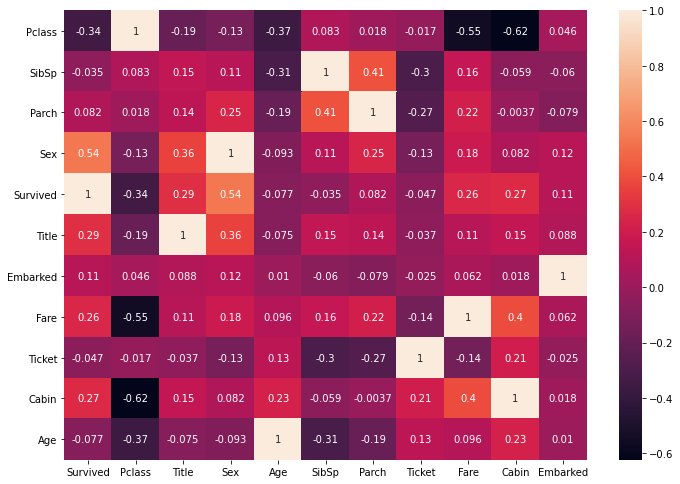

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_fact.corr().sort_values(by='Age'), annot=True)


In [19]:
df[['Pclass', 'SibSp']].corr()

,Pclass,SibSp
Pclass,1.000000,0.083081
SibSp,0.083081,1.000000


In [20]:
import numpy as np

In [21]:
# transformation
df['Title'].replace('the', 'Countess', inplace=True)

In [22]:
df.loc[df['Title'] == 'Countess']

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
760,1,1,Countess,female,33.0,0,0,110152,86.5,B77,S


In [23]:
pd.pivot_table(data=df, values='Pclass', index=['Title', 'Survived']
               , aggfunc='count').sort_values(by='Pclass')

Pclass
Title    Survived        
Capt     0              1
Ms       1              1
Mme      1              1
Major    1              1
         0              1
Lady     1              1
Jonkheer 0              1
Sir      1              1
Don      0              1
Countess 1              1
Col      1              1
         0              1
Mlle     1              2
Dr       1              3
         0              4
Rev      0              6
Master   0             17
         1             23
Mrs      0             26
Miss     0             55
Mr       1             81
Mrs      1             99
Miss     1            127
Mr       0            436

In [24]:
# transformation
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# tranformation

for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = pd.factorize(df[col])[0]


In [26]:
# tranformation
for i in range(0, 2):
        for j in range(0, 3):
            guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = age_guess
guess_ages


array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [27]:
# tranformation

for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), ['Age']] = guess_ages[i,j]


df['Age'] = df['Age'].astype(int)

df['Age'].isnull().sum()

0

In [28]:
# tranformation
# modeltest




In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Title     891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int64  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(9)
memory usage: 120.1 KB


In [30]:
# df['Cabin'].fillna(9999, inplace=True)

<AxesSubplot:>

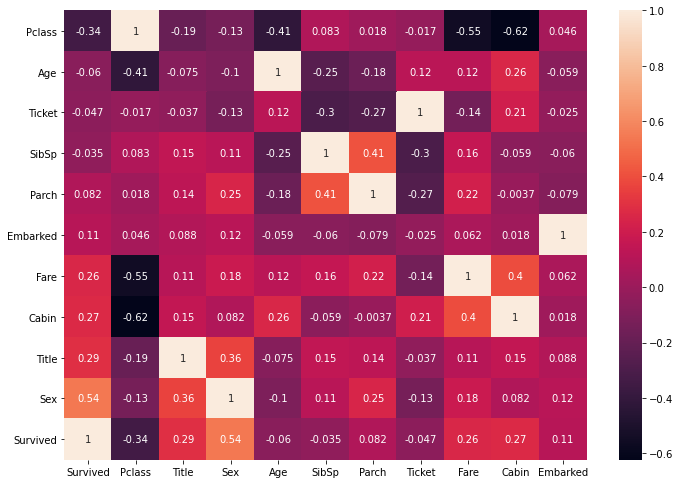

In [31]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr().sort_values(by='Survived'), annot=True)

In [32]:
# modeltest
# mutlicolinearity

In [33]:
from sklearn import preprocessing

label = 'Survived'
X = df.drop(label, 1)
X = preprocessing.scale(X)
y = df[label]

In [34]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")

In [35]:
pipelines = []
pipelines.append(('LR', Pipeline([('LR',LogisticRegression())])))
pipelines.append(('KNN', Pipeline([('KNN',KNeighborsClassifier())])))
pipelines.append(('SVC', Pipeline([('SVC',SVC())])))
pipelines.append(('GNB', Pipeline([('GNB',GaussianNB())])))
pipelines.append(('MNB', Pipeline([('MNB',MultinomialNB())])))
pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier())])))
pipelines.append(('XGB', Pipeline([('XGB',XGBClassifier())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=8, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# Best unscaled
# RF: 0.832810 (0.031886)
# Best scaled
# RF: 0.826074 (0.024760)
# SVC: 0.826044 (0.023167)

LR: 0.801319 (0.016805)
KNN: 0.818221 (0.024537)
SVC: 0.826044 (0.023167)
GNB: 0.769908 (0.022490)
MNB: nan (nan)
RF: 0.833957 (0.031740)
XGB: 0.810389 (0.026274)


In [36]:

pipelines = []
pipelines.append(('SVC', Pipeline([('SVC',SVC())])))
pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=8, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# RF scaled is winner


SVC: 0.826044 (0.023167)
RF: 0.838451 (0.033914)


In [37]:
from sklearn.model_selection import GridSearchCV


In [38]:
# param_grid = dict(
#     n_estimators = range(50, 100, 100),
#     criterion = ['gini', 'entropy'],
#     max_depth = [5, 8, 15, 25, 30],
#     min_samples_split = [2, 5, 10, 15, 100],
#     min_samples_leaf = [1, 2, 5, 10],
#     max_features = ['auto', 'sqrt', 'log2']
# )
#
# model = RandomForestClassifier(random_state=21)
# kfold = KFold(n_splits=8, random_state=21)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
# grid_result = grid.fit(X, y)
#
# means = grid_result.cv_results_['mean_test_score']
# params = grid_result.cv_results_['params']
# for mean, param in zip(means, params):
#     print("%f with: %r" % (mean, param))
#
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Best: 0.846284 using {'criterion': 'entropy', 'max_depth': 25,
#                   'max_features': 'auto', 'min_samples_leaf': 2,
#                   'min_samples_split': 2, 'n_estimators': 50}

best_params = {'criterion': 'entropy', 'max_depth': 25,
               'max_features': 'auto', 'min_samples_leaf': 2,
               'min_samples_split': 2, 'n_estimators': 50}


In [39]:
# Final model
final_model = RandomForestClassifier(**best_params)



In [40]:
from sklearn.model_selection import  train_test_split
import pickle

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)


In [45]:
scores = []
for _ in range(50):
    final_model.fit(X_train, y_train)
    score  = (final_model.score(X_test, y_test))
    scores.append(score)

print(np.mean(scores))

0.8223463687150837


In [46]:
pickle.dump(final_model, open('final_model', 'wb'))

